<a href="https://colab.research.google.com/github/joomj2000/SKT_FLY_AI/blob/main/shape_CNN_%EC%A3%BC%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/drive/folders/1ZXBGWoY8DbEnjpyZjDfFoYF1hUgLlOPP?usp=drive_link

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# 데이터 불러오기
train_data_dir = '/content/drive/MyDrive/shapes'


train_datagen = ImageDataGenerator(rescale=1./255) # 이미지 데이터 생성기 설정

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.3, random_state=42)


val_datagen = ImageDataGenerator(rescale=1./255)

# 이미지 데이터 로드 하고 전처리
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)

# 검증 데이터 생성기
val_generator = val_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)




Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))  # 클래스 수에 맞는 출력 층 설정

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# checkpoint
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1,
                                                save_best_only=True)

# early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)



# 모델 훈련 및 정확도 평가
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=val_generator,
                    callbacks=[checkpoint, early_stopping])


test_loss, test_acc = model.evaluate(val_generator)
print('테스트 정확도:', test_acc)



Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 1.1060 - accuracy: 0.3333
Epoch 1: val_loss improved from inf to 1.09635, saving model to training/cp.ckpt
10/10 [==============================] - 4s 194ms/step - loss: 1.1060 - accuracy: 0.3333 - val_loss: 1.0964 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 1.0943 - accuracy: 0.3467
Epoch 2: val_loss improved from 1.09635 to 1.08098, saving model to training/cp.ckpt
10/10 [==============================] - 2s 169ms/step - loss: 1.0943 - accuracy: 0.3467 - val_loss: 1.0810 - val_accuracy: 0.3633
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 1.0667 - accuracy: 0.5000
Epoch 3: val_loss improved from 1.08098 to 1.05021, saving model to training/cp.ckpt
10/10 [==============================] - 2s 168ms/step - loss: 1.0667 - accuracy: 0.5000 - val_loss: 1.0502 - val_accuracy: 0.4833
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 1.

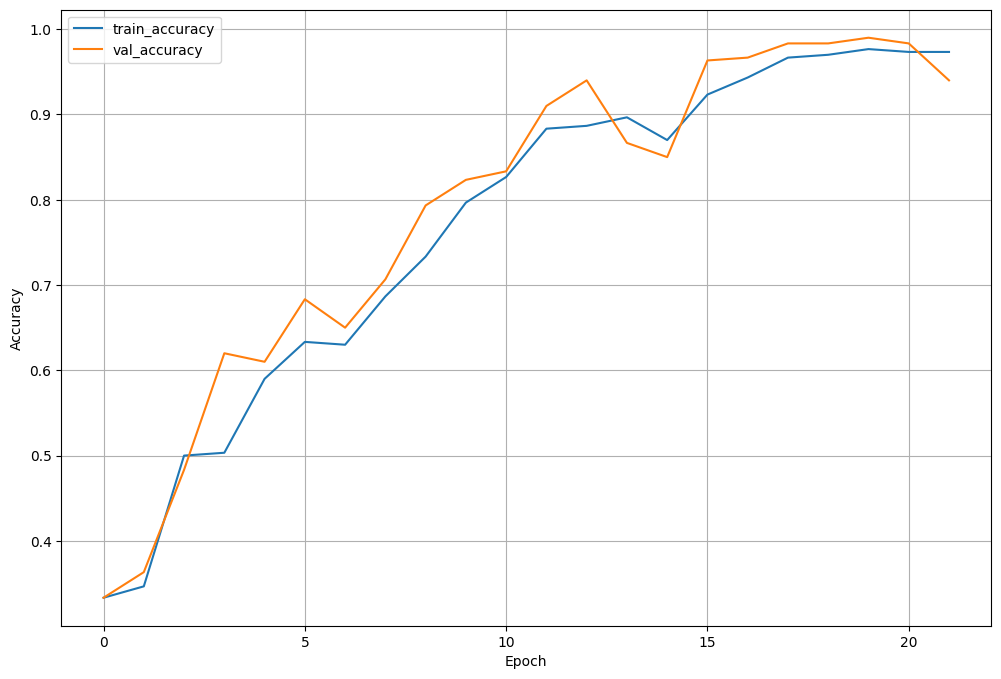

In [ ]:
import matplotlib.pyplot as plt
# 학습 곡선 그리기
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

<H1> 데이터 증강 설정



---



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# 데이터 경로 설정
train_data_dir = '/content/drive/MyDrive/shapes'

# 데이터 분리
images, labels = [], []
for label_folder in os.listdir(train_data_dir):
    label_path = os.path.join(train_data_dir, label_folder)
    for image_file in os.listdir(label_path):
        image_path = os.path.join(label_path, image_file)
        images.append(image_path)
        labels.append(label_folder)

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.3, random_state=42)



In [ ]:
# 이미지 데이터 생성기 설정 및 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # 이미지 회전(도) 범위
    width_shift_range=0.2,  # 가로 방향 수평 이동 범위
    height_shift_range=0.2,  # 세로 방향 수직 이동 범위
    shear_range=0.2,  # 전단 변환 범위
    zoom_range=0.2,  # 확대/축소 범위
    horizontal_flip=True,  # 수평 뒤집기
    fill_mode='nearest'  # constant nearest reflect wrap
)

val_datagen = ImageDataGenerator(rescale=1./255)

# train 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # 이미지 크기 조정
    batch_size=32,
    class_mode='categorical'  # 다중 클래스 분류
)

# 검증 데이터 생성기
val_generator = val_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # 이미지 크기 조정
    batch_size=32,
    class_mode='categorical'  # 다중 클래스 분류
)


Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# checkpoint
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1,
                                                save_best_only=True)

# early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)



In [ ]:
# 모델 훈련 및 정확도 평가
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=val_generator,
                    callbacks=[checkpoint, early_stopping])


test_loss, test_acc = model.evaluate(val_generator)
print('테스트 정확도:', test_acc)


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 1.1146 - accuracy: 0.3300
Epoch 1: val_loss improved from inf to 1.10268, saving model to training/cp.ckpt
10/10 [==============================] - 3s 205ms/step - loss: 1.1146 - accuracy: 0.3300 - val_loss: 1.1027 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 1.1073 - accuracy: 0.3200
Epoch 2: val_loss improved from 1.10268 to 1.10128, saving model to training/cp.ckpt
10/10 [==============================] - 3s 262ms/step - loss: 1.1073 - accuracy: 0.3200 - val_loss: 1.1013 - val_accuracy: 0.3333
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 1.1084 - accuracy: 0.3333
Epoch 3: val_loss improved from 1.10128 to 1.09666, saving model to training/cp.ckpt
10/10 [==============================] - 2s 190ms/step - loss: 1.1084 - accuracy: 0.3333 - val_loss: 1.0967 - val_accuracy: 0.4067
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 1.

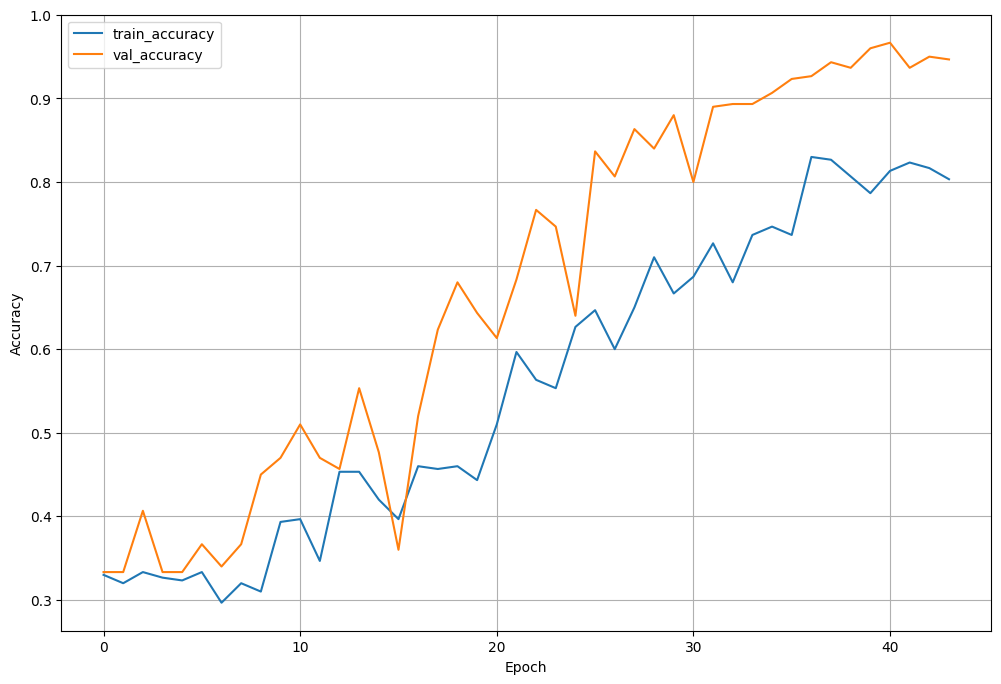

In [ ]:
# 학습 곡선 그리기
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()